#HDF5 file format
HDF5 is a data format that stores and manages large and complex data with lesser disk space and faster retrieve. 

While reading and working on large datasets, we often run into out of memory error because of the large memory used. Storing data is some other format which is fast to access and smaller in size, is one of the solutions for this problem. One such file format is HDF5. 


HDF stands for **Hierarchical Data Format**. Most common version used is Version 5. 

A HDF file can store any kind of heterogeneous data objects such as images, arrays, tables, graphs, documents etc. It organizes the data in hierarchical fashion. Every HDF file starts with a root group('/') that contains other groups and/or data objects.

https://www.numpyninja.com/post/hdf5-file-format-with-pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##reading data 

In [ ]:
from pandas import read_hdf

In [ ]:
import networkx as nx

In [ ]:
train_graph=nx.read_edgelist('/content/drive/MyDrive/Facebook/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [ ]:
train_data = read_hdf('/content/drive/MyDrive/Facebook/data/fea_sample/storage_sample_stage4.h5','train_df',mode='r')
test_data = read_hdf('/content/drive/MyDrive/Facebook/data/fea_sample/storage_sample_stage4.h5','test_df',mode='r')

adding num_followers_d feature

In [ ]:
def compute_features_stage1(df_final):
  num_followers_d=[]
  for i,row in df_final.iterrows():
    try:
      d1=set(train_graph.predecessors(row['destination_node']))
    except:
      d1 = set()
    
    num_followers_d.append(len(d1))
  return num_followers_d

In [ ]:
train_data['num_followers_d']= compute_features_stage1(train_data)
test_data['num_followers_d']=compute_features_stage1(test_data)

In [ ]:
train_data.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,6
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,94
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,28
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,11
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


In [ ]:
test_data.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,2.701538e-12,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,14
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,2.248568e-14,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,17
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,1.778927e-12,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,10
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,7.917166e-13,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,37
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,1.361574e-13,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,27


In [ ]:
train_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d'],
      dtype='object')

In [ ]:
test_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d'],
      dtype='object')

#Preferential attachment

In [ ]:
def pref_attachment(df):
  pref_attach_followers  =[]
  pref_attach_followees = []

  for i,row in df.iterrows():
    pref_attach_followers.append(row['num_followers_s']*row['num_followers_d'])
    pref_attach_followees.append(row['num_followees_s']*row['num_followees_d'])
  return pref_attach_followers,pref_attach_followees

In [ ]:
train_data['pref_attach_followers'],train_data['pref_attach_followees'] = pref_attachment(train_data)
test_data['pref_attach_followers'],test_data['pref_attach_followees'] = pref_attachment(test_data)

In [ ]:
train_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'pref_attach_followers', 'pref_attach_followees'],
      dtype='object')

In [ ]:
test_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'pref_attach_followers', 'pref_attach_followees'],
      dtype='object')

In [ ]:
from pandas import HDFStore,DataFrame

In [ ]:
hdf = HDFStore('/content/drive/MyDrive/Colab Notebooks/assignmentfiles/_my_data.h5')
hdf.put('train_df',train_data, format='table', data_columns=True)
hdf.put('test_df',test_data, format='table', data_columns=True)
hdf.close()

#svd_dot

In [ ]:
train_data = read_hdf('/content/drive/MyDrive/Colab Notebooks/assignmentfiles/_my_data.h5','train_df',mode='r')
test_data = read_hdf('/content/drive/MyDrive/Colab Notebooks/assignmentfiles/_my_data.h5','test_df',mode='r')

In [ ]:
import numpy as np

In [ ]:
def svd_dot(train_data):
  u_dot = []
  v_dot = []
  u_source = train_data.columns[train_data.columns.str.match('svd_u_s')]
  u_destination = train_data.columns[train_data.columns.str.match('svd_u_d')]
  v_source = train_data.columns[train_data.columns.str.match('svd_v_s')]
  v_destination = train_data.columns[train_data.columns.str.match('svd_v_d')]
  for i,row in train_data.iterrows():
    u_dot.append(np.dot(row[u_source],row[u_destination]))
    v_dot.append(np.dot(row[v_source],row[v_destination]))
  return u_dot,v_dot

In [ ]:
train_data['u_dot'],train_data['v_dot']= svd_dot(train_data)

In [ ]:
test_data['u_dot'],test_data['v_dot']=svd_dot(test_data)

In [ ]:
train_data.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,pref_attach_followers,pref_attach_followees,u_dot,v_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,6,36.0,120.0,1.114958e-11,2.238775e-12
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,94,8836.0,8662.0,3.192812e-03,9.068719e-04
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,28,784.0,902.0,1.787503e-35,2.467873e-36
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,11,121.0,35.0,4.710376e-20,3.159386e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1.0,33.0,7.773952e-14,0.000000e+00


In [ ]:
test_data.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,pref_attach_followers,pref_attach_followees,u_dot,v_dot
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,14,196.0,54.0,8.425267e-20,2.074808e-17
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,17,289.0,19.0,1.352160e-17,1.188376e-17
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,10,100.0,144.0,3.671980e-13,3.904885e-12
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,37,1369.0,340.0,1.634044e-10,9.819784e-11
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,27,729.0,405.0,1.246700e-11,1.300892e-11


In [ ]:
train_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'pref_attach_followers', 'pref_attach_followees',
       'u_dot', 'v_dot'],
      dtype='object')

In [ ]:
test_data.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'pref_attach_followers', 'pref_attach_followees',
       'u_dot', 'v_dot'],
      dtype='object')

In [ ]:
hdf = HDFStore('/content/drive/MyDrive/Colab Notebooks/assignmentfiles/_my_data2.h5')
hdf.put('train_df',train_data, format='table', data_columns=True)
hdf.put('test_df',test_data, format='table', data_columns=True)
hdf.close()

#XgBoost

##Hyper parameter tuning using RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
x_train = train_data.drop(['source_node', 'destination_node','indicator_link'],axis=1)
y_train = train_data['indicator_link']
x_test = test_data.drop(['source_node', 'destination_node','indicator_link'],axis=1)
y_test = test_data['indicator_link']


In [ ]:
clf = XGBClassifier()
params={
    'learning_rate':[0.03,0.06,0.12],
     'n_estimators':[250,500,1000],
     'max_depth':[10,15,20],
    'colsample_bytree':[0.25,0.5,1],
    'subsample':[0.2,0.4,0.8]
}

ran_s_cv=RandomizedSearchCV(clf,param_distributions=params,verbose=5,n_jobs=-1)
ran_s_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.25, 0.5, 1],
                                        'learning_rate': [0.03, 0.06, 0.12],
                                        'max_depth': [10, 15, 20],
                                        'n_estimators': [250, 500, 1000],
                                        'subsample': [0.2, 0.4, 0.8]},
                   verbose=5)

In [ ]:
ran_s_cv.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'max_depth': 10,
 'learning_rate': 0.12,
 'colsample_bytree': 1}

In [ ]:
clf = XGBClassifier(subsample=0.8,n_estimators=250,max_depth=10,learning_rate=0.12,colsample_bytree=1,nthread=-1)
clf.fit(x_train,y_train,verbose=True)

XGBClassifier(learning_rate=0.12, max_depth=10, n_estimators=250, nthread=-1,
              subsample=0.8)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 1.0
Test f1 score 0.9265284423179161


In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


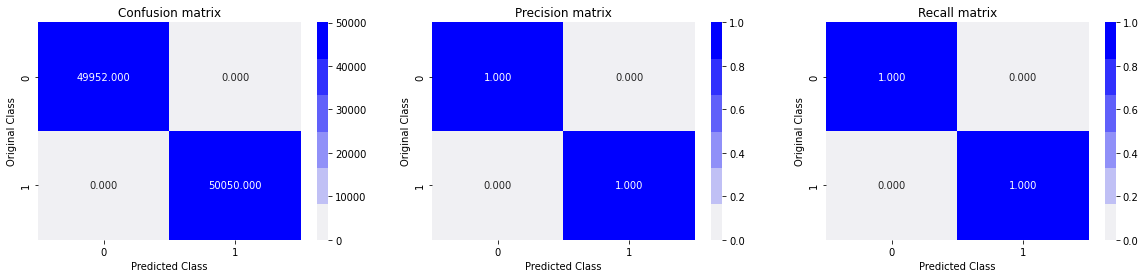

Test confusion_matrix


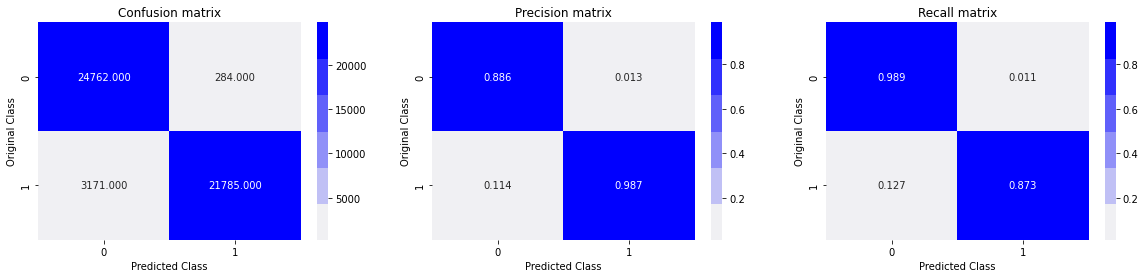

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [ ]:
from prettytable import PrettyTable, ALL

#Observations

In [ ]:
table = PrettyTable(hrules =ALL)
table.field_names= ['Data','F1_score','precision_1','precision_0','recall_1','recall_0']
table.add_row(["Train",f1_score(y_train,y_train_pred),1,1,1,1])
table.add_row(["Test",f1_score(y_test,y_test_pred),0.987,0.886,0.873,0.989])

print(table)

+-------+--------------------+-------------+-------------+----------+----------+
|  Data |      F1_score      | precision_1 | precision_0 | recall_1 | recall_0 |
+-------+--------------------+-------------+-------------+----------+----------+
| Train |        1.0         |      1      |      1      |    1     |    1     |
+-------+--------------------+-------------+-------------+----------+----------+
|  Test | 0.9265284423179161 |    0.987    |    0.886    |  0.873   |  0.989   |
+-------+--------------------+-------------+-------------+----------+----------+


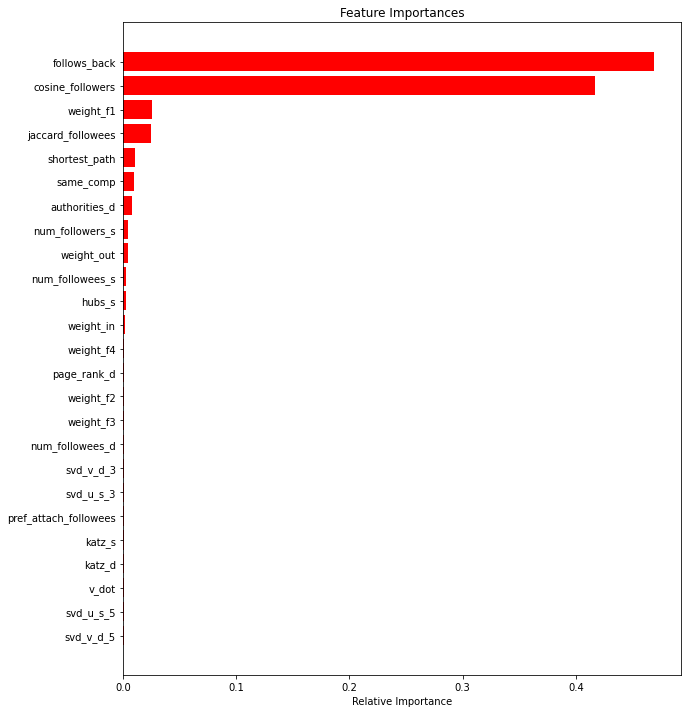

In [ ]:
features = x_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* F1 score 1 means perfect recall and precision as shown in the plots
* Among the features newly added **preferencial attachment** is has more importance and next **v_dot**
